In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('D:\Data analysis\premier-league-data.csv')

In [3]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   4560 non-null   object 
 1   away_team   4560 non-null   object 
 2   home_goals  4560 non-null   float64
 3   away_goals  4560 non-null   float64
 4   result      4560 non-null   object 
 5   season      4560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.9+ KB


In [5]:
df['season'].value_counts()

2006-2007    380
2007-2008    380
2008-2009    380
2009-2010    380
2010-2011    380
2011-2012    380
2012-2013    380
2013-2014    380
2014-2015    380
2015-2016    380
2016-2017    380
2017-2018    380
Name: season, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   4560 non-null   object 
 1   away_team   4560 non-null   object 
 2   home_goals  4560 non-null   float64
 3   away_goals  4560 non-null   float64
 4   result      4560 non-null   object 
 5   season      4560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.9+ KB


<Axes: ylabel='Frequency'>

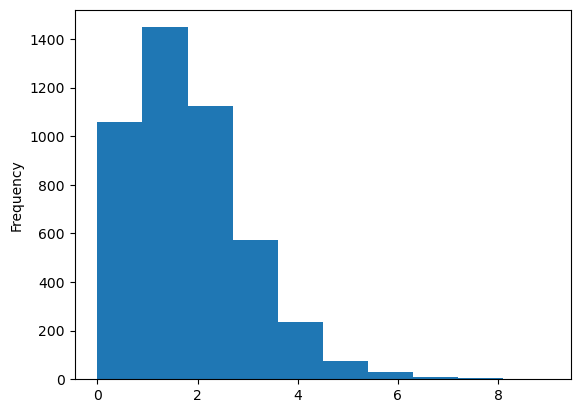

In [7]:
df['home_goals'].plot(kind='hist')

<Axes: >

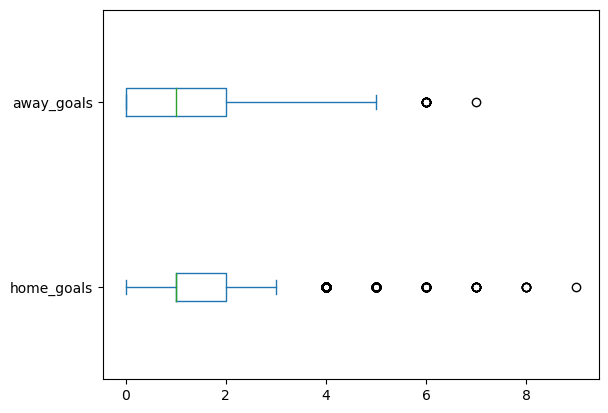

In [8]:
df[['home_goals','away_goals']].plot(kind='box',vert=False)

In [9]:
(df[['home_goals','away_goals']]<0).sum()

home_goals    0
away_goals    0
dtype: int64

In [10]:
(df['home_goals']+df['away_goals']).mean()

2.6875

In [11]:
df['total_goals']=(df['home_goals']+df['away_goals'])

In [12]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2.0
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2.0
2,Everton,Watford,2.0,1.0,H,2006-2007,3.0
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,3.0
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,3.0


In [13]:
goals_per_season=df.groupby("season")["total_goals"].mean().sort_index()

In [14]:
goals_per_season

season
2006-2007    2.450000
2007-2008    2.636842
2008-2009    2.478947
2009-2010    2.771053
2010-2011    2.797368
2011-2012    2.805263
2012-2013    2.797368
2013-2014    2.768421
2014-2015    2.565789
2015-2016    2.700000
2016-2017    2.800000
2017-2018    2.678947
Name: total_goals, dtype: float64

In [15]:
(df['home_goals']-df['away_goals']).max()

8.0

In [16]:
(df['away_goals']-df['home_goals']).max()

6.0

In [17]:
(df['home_goals']-df['away_goals']).abs().sort_values(ascending=False).head()

1265    8.0
3116    8.0
2458    8.0
1514    8.0
2753    7.0
dtype: float64

In [21]:
df.loc[df['result']=='A'].groupby('away_team')['result'].size().sort_values(ascending=False)

away_team
Chelsea                     123
Manchester United           119
Arsenal                     103
Manchester City             100
Liverpool                    98
Tottenham Hotspur            90
Everton                      64
Aston Villa                  51
West Ham United              43
Newcastle United             40
Stoke City                   35
Sunderland                   34
West Bromwich Albion         34
Southampton                  33
Swansea City                 31
Wigan Athletic               29
Crystal Palace               27
Blackburn Rovers             26
Bolton Wanderers             25
Fulham                       23
Leicester City               22
Portsmouth                   16
Watford                      15
AFC Bournemouth              13
Norwich City                 12
Hull City                    12
Burnley                      12
Reading                       9
Birmingham City               9
Wolverhampton Wanderers       9
Middlesbrough                 

In [22]:
df.groupby('away_team').apply(lambda rows:(rows['result']=='A').sum()).sort_values(ascending=False).head()

away_team
Chelsea              123
Manchester United    119
Arsenal              103
Manchester City      100
Liverpool             98
dtype: int64

In [23]:
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007,2.0
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007,2.0
2,Everton,Watford,2.0,1.0,H,2006-2007,3.0
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007,3.0
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007,3.0


In [31]:
df.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).head()

home_team
Manchester City      501.0
Manchester United    495.0
Chelsea              491.0
Arsenal              479.0
Liverpool            466.0
Name: home_goals, dtype: float64

In [37]:
home_game_goal_conceded=df.groupby('home_team')[['home_team','away_goals']].agg({
    "home_team":"size",
    "away_goals":"sum"
}).rename(
    columns={'home_team':'game_played','away_goals':'goal_conceded'}
).sort_values(by=['game_played','goal_conceded'],ascending=[False,True])


In [39]:
home_game_goal_conceded.head()

,game_played,goal_conceded
home_team,,
Manchester United,228,160.0
Liverpool,228,182.0
Arsenal,228,185.0
Chelsea,228,186.0
Manchester City,228,192.0


In [45]:
df.groupby('away_team')['away_goals'].sum().sort_values(ascending=False).head()

away_team
Arsenal              382.0
Manchester United    372.0
Chelsea              368.0
Manchester City      365.0
Liverpool            351.0
Name: away_goals, dtype: float64